In [1]:
import numpy as np
import scipy as sp
import sympy as smp
from IPython.display import display, Math, Latex
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.axes as axes
import math
import statistics as stat
from scipy import optimize
import uncertainties as uc
import uncertainties.unumpy as unp 
unv=unp.nominal_values
usd=unp.std_devs

In [32]:
#Import Daten    
Rr=np.array([5,10,20,30,50,100,200,1000,10**10]) #inf oder große Zahl??
U1r=np.array([0.29,0.45,0.68,0.80,0.94,1.09,1.19,1.26,1.29])
UPr=np.array([0.59,0.80,0.99,1.08,1.15,1.21,1.25,1.29,1.29])
URr=np.array([0.32,0.60,1.05,1.38,1.85,2.49,3.50,3.65,3.95])


In [33]:
#Unsicherheiten
ur=0.05*Rr
R=unp.uarray(Rr,ur)
uU=0.05/np.sqrt(6)
U1=unp.uarray(U1r,uU)
I1=U1/R
UP=unp.uarray(UPr,uU)
UR=unp.uarray(URr,uU)
I1

array([0.057999999999999996+/-0.0050076607978842445,
       0.045+/-0.0030379543555930314, 0.034+/-0.001982843076662061,
       0.02666666666666667+/-0.001496910398367498,
       0.018799999999999997+/-0.0010248251883451472,
       0.0109+/-0.0005819722215592997,
       0.0059499999999999996+/-0.00031452013714016255,
       0.00126+/-6.622436610996489e-05, 1.29e-10+/-6.765291321640678e-12], dtype=object)

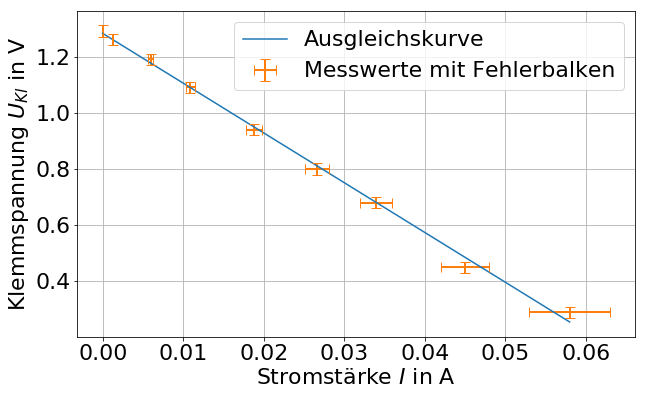

In [8]:
#Plot der daten einer Batterie

x=unv(I1) #np.array([1,2,3,4,5,6,7,8,9])

y=unv(U1) #np.array([1,2,3,4,5,6,7.8,8,9])

#I1=unv(U1/R)
#U1p=unv(U1)

def lin(x,m,b):
    return(m*x+b)

fig=plt.figure(figsize=(10,6))


p0=[ 1000000000000,  0.01103765]
popt, pcov, infodict, errmsg, ier = optimize.curve_fit(lin,x,y,p0=p0, full_output= True)
plt.plot(x,lin(x,*popt),label='Ausgleichskurve')
#plt.errorbar(unv(I1),unv(U1),usd(U1),usd(I1),fmt='none', capsize=5, linewidth=2, label='Messwerte mit Fehlerbalken')
plt.errorbar(x,y,usd(U1),usd(I1),fmt='none', capsize=5, linewidth=2, label='Messwerte mit Fehlerbalken')



plt.legend(prop={'size':22}) #ehem 14
plt.grid()
plt.tick_params(labelsize=22)
plt.ylabel("Klemmspannung $U_{Kl}$ in V ", {'fontsize':22})
plt.xlabel("Stromstärke $I$ in A", {'fontsize': 22})
plt.savefig("1Batterie.pdf")
plt.show()

In [8]:
popt, np.sqrt(np.diag(pcov))

(array([-17.69918755,   1.28222712]), array([ 0.35362661,  0.01038734]))

In [11]:
U10=popt[1]
R1i=-popt[0]
I1max=U10/R1i
R=R[0:7]
U10,I1max,R1i

(1.2822271160744745, 0.072445535261274355, 17.699187554486702)

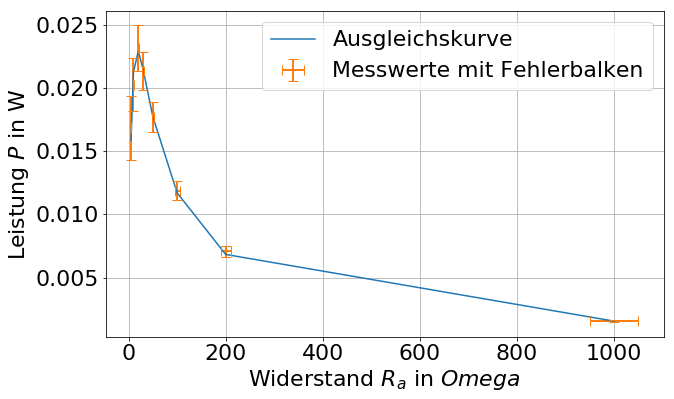

In [35]:
#Leistung

x=unv(R)[0:8]
y=unv(U1**2/R)[0:8]

def p(x,U0P,Ri):
    return(U0P**2*x/(x+Ri)**2)

fig=plt.figure(figsize=(10,6))


p0=[1,1]
popt, pcov, infodict, errmsg, ier = optimize.curve_fit(p,x,y,p0=p0, full_output= True)
plt.plot(x,p(x,*popt),label='Ausgleichskurve')
#plt.errorbar(unv(I1),unv(U1),usd(U1),usd(I1),fmt='none', capsize=5, linewidth=2, label='Messwerte mit Fehlerbalken')
plt.errorbar(unv(R)[0:8],unv(U1**2/R)[0:8],usd(U1**2/R)[0:8],usd(R)[0:8],fmt='none', capsize=5, linewidth=2, label='Messwerte mit Fehlerbalken')



plt.legend(prop={'size':22}) #ehem 14
plt.grid()
plt.tick_params(labelsize=22)
plt.ylabel("Leistung $P$ in W ", {'fontsize':22})
plt.xlabel("Widerstand $R_{a}$ in $Omega$", {'fontsize': 22})
plt.savefig("P1.pdf")
plt.show()

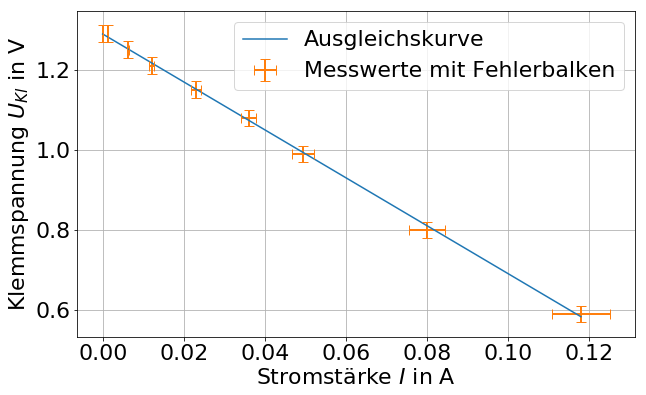

In [9]:
#Plot der daten 3 Parralel Batterie

x=unv(UP/R) #np.array([1,2,3,4,5,6,7,8,9])

y=unv(UP) #np.array([1,2,3,4,5,6,7.8,8,9])

#I1=unv(U1/R)
#U1p=unv(U1)

def lin(x,m,b):
    return(m*x+b)

fig=plt.figure(figsize=(10,6))


p0=[ -2,  5]
popt, pcov, infodict, errmsg, ier = optimize.curve_fit(lin,x,y,p0=p0, full_output= True)
plt.plot(x,lin(x,*popt),label='Ausgleichskurve')
#plt.errorbar(unv(I1),unv(U1),usd(U1),usd(I1),fmt='none', capsize=5, linewidth=2, label='Messwerte mit Fehlerbalken')
plt.errorbar(x,y,usd(UP),usd(UP/R),fmt='none', capsize=5, linewidth=2, label='Messwerte mit Fehlerbalken')



plt.legend(prop={'size':22}) #ehem 14
plt.grid()
plt.tick_params(labelsize=22)
plt.ylabel("Klemmspannung $U_{Kl}$ in V ", {'fontsize':22})
plt.xlabel("Stromstärke $I$ in A", {'fontsize': 22})
plt.savefig("3PBatterie.pdf")
plt.show()

In [15]:

UP0=uc.ufloat(popt[1],np.sqrt(np.diag(pcov))[1])
RPi=uc.ufloat(-popt[0],np.sqrt(np.diag(pcov))[0])
IPmax=UP0/RPi

UP0,IPmax,RPi,

(1.2891323893041842+/-0.0031650053239154997,
 0.2153670051370454+/-0.0022334437307013023,
 5.985746927593969+/-0.06030996727178226)

In [24]:
p,len(x),len(y)

(<function __main__.p>, 8, 8)